# EDA

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
# Reading the data from the cleaned CSV file
# file_path = "/content/drive/Shareddrives/DATA_228_Project/cleaned_playstore.csv"
# playstore = pd.read_csv(file_path)

In [4]:
# Reading the data from the cleaned CSV file
path = "cleaned_playstore.csv"
playstore = pd.read_csv(path)

In [5]:
playstore.shape

(1048575, 24)

### 1. Count of Apps in 'Popularity' Category

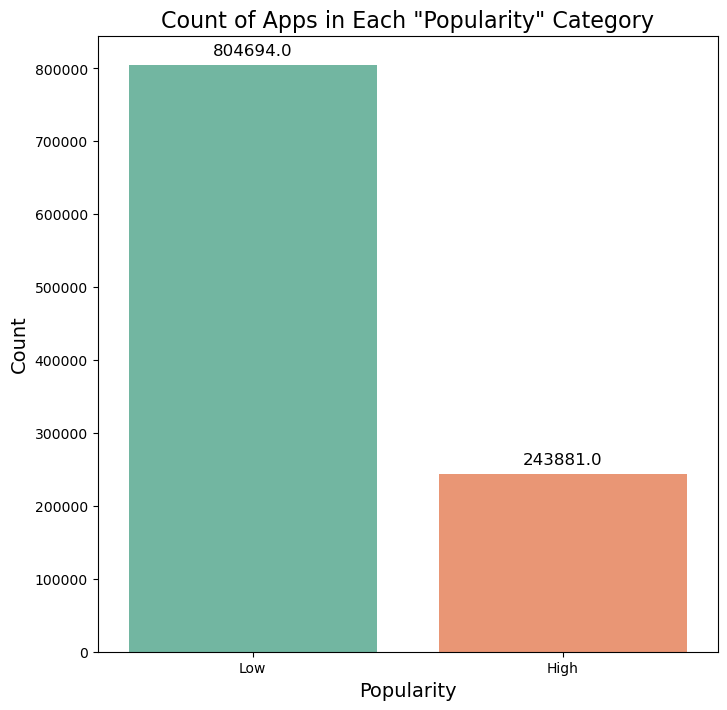

In [6]:
# Count plot for 'Popularity'
plt.figure(figsize=(8, 8))
sns.countplot(x='Popularity', data=playstore, palette='Set2')

# Annotating the count at the top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Count of Apps in Each "Popularity" Category', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

___

### Correlation Matrix showing the correlation of different features with "Rating Category"

/var/folders/h6/5781z52s1gxglkf7kt7vfng40000gn/T/ipykernel_89281/4021907633.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = playstore.corr()


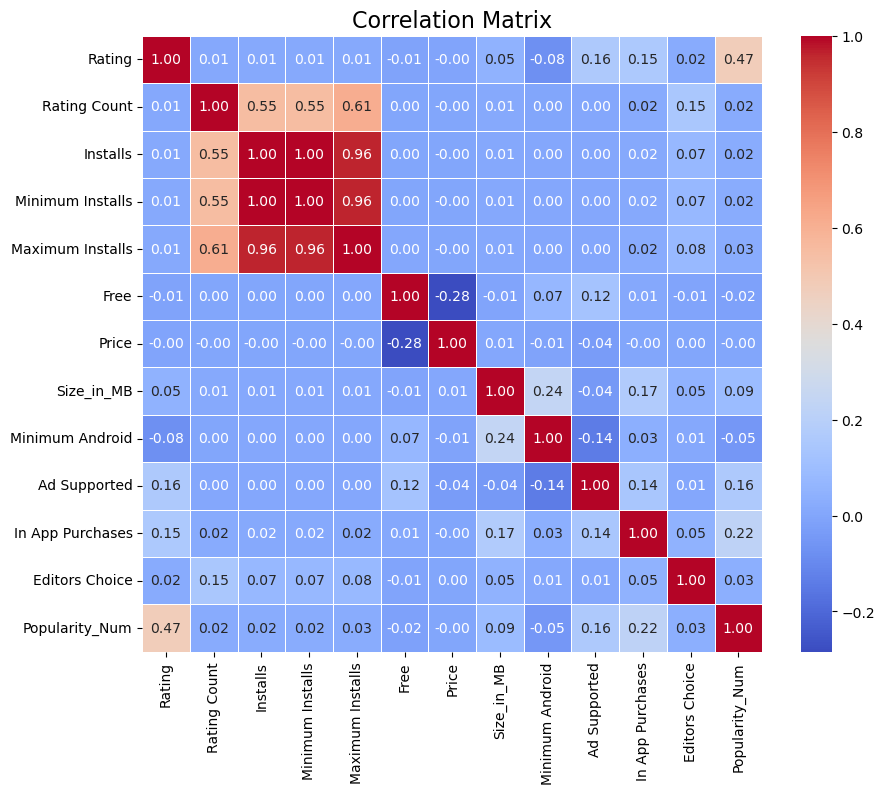

In [7]:
# Creating a new column 'Popularity_Num' to map 1 to 'High' and 0 to 'Low'
playstore['Popularity_Num'] = playstore['Popularity'].map({'High': 1, 'Low': 0})

# Calculate the correlation matrix
correlation_matrix = playstore.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

___

### More Plots

### 1. Count of apps in each Category

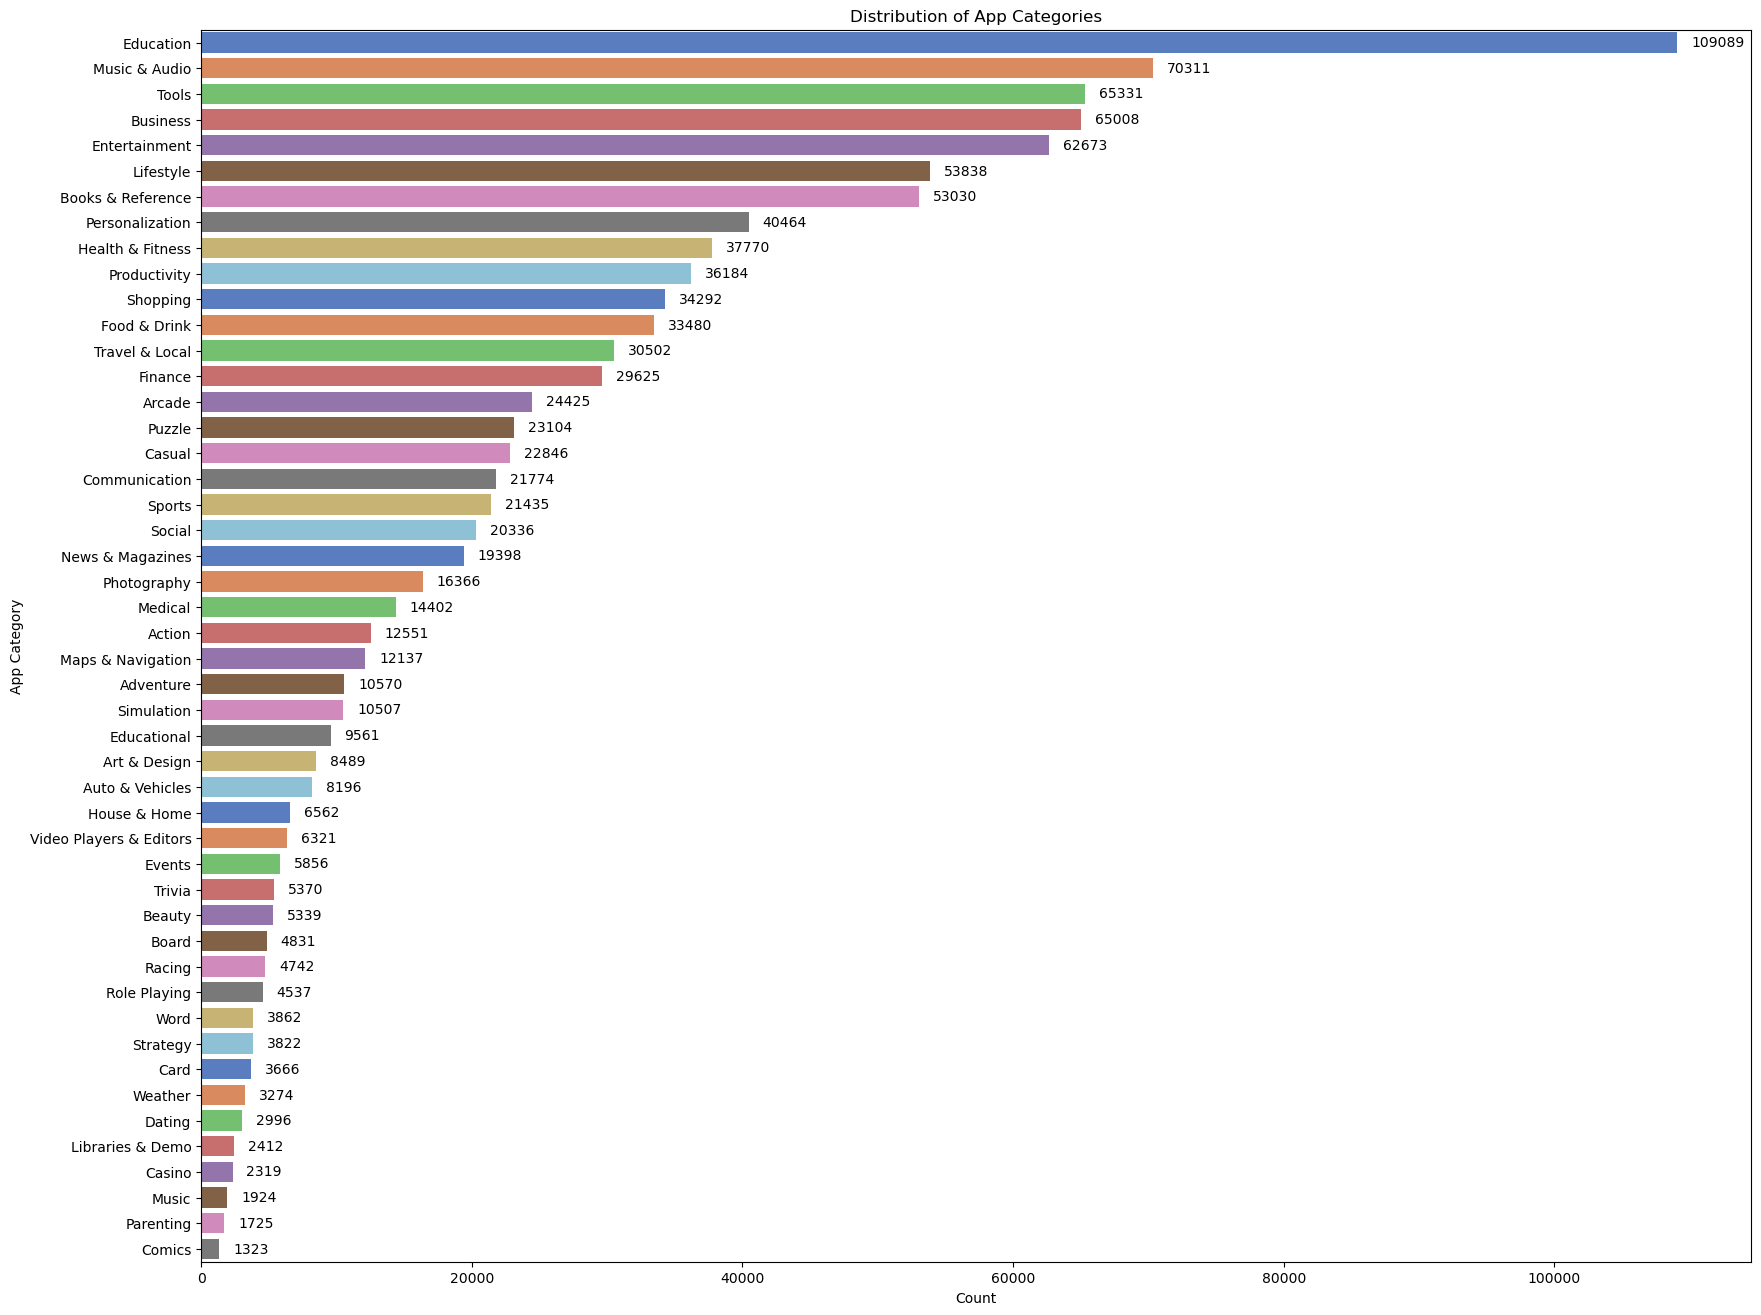

In [8]:
# Countplot for App Categories
plt.figure(figsize=(20, 16))
ax = sns.countplot(y='Category', data=playstore, order=playstore['Category'].value_counts().index, palette='muted')

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='black')

plt.title('Distribution of App Categories')
plt.xlabel('Count')
plt.ylabel('App Category')
plt.show()

___

### 2. Histogram for Rating column

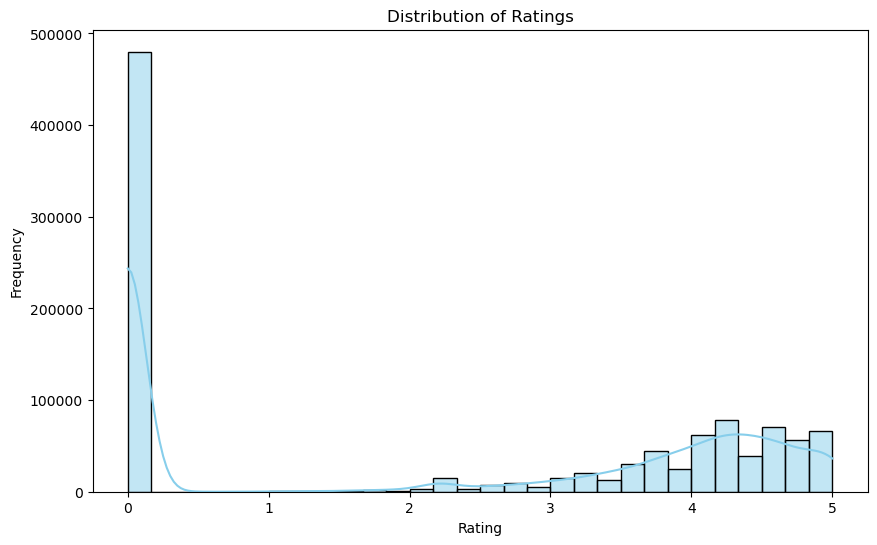

In [9]:
# Histogram for Rating column
plt.figure(figsize=(10, 6))
sns.histplot(playstore['Rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

___

### Install over Time Plot

/var/folders/h6/5781z52s1gxglkf7kt7vfng40000gn/T/ipykernel_89281/3362598808.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Last Updated', y='Installs', data=playstore, estimator=sum, ci=None)


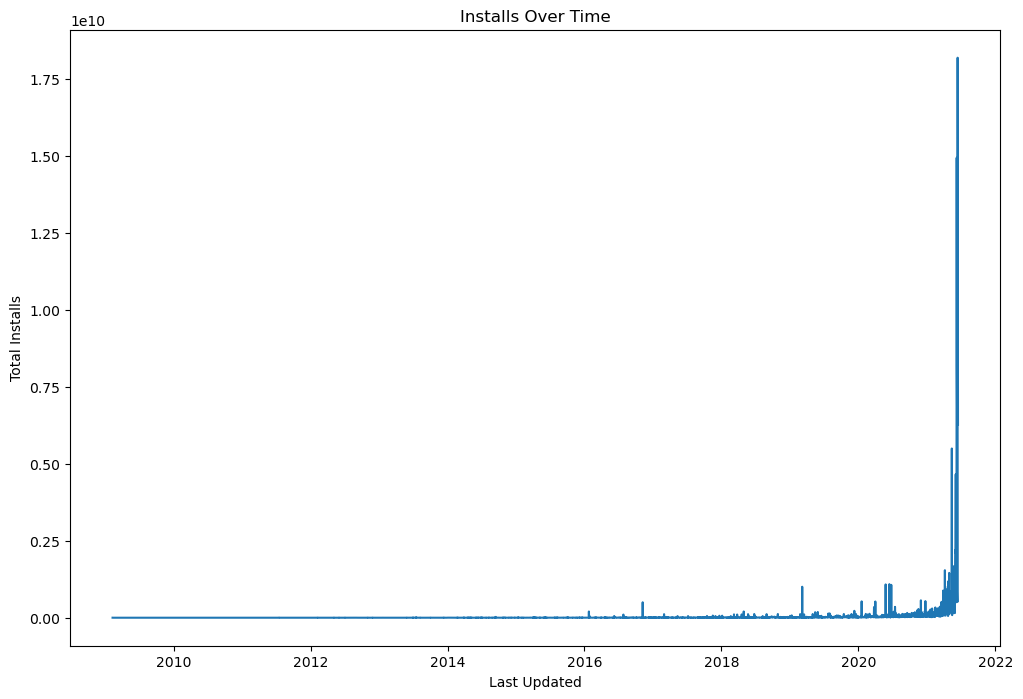

In [10]:
# Converting 'Last Updated' to datetime
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

# Plotting with the corrected 'Last Updated' column
plt.figure(figsize=(12, 8))
sns.lineplot(x='Last Updated', y='Installs', data=playstore, estimator=sum, ci=None)
plt.title('Installs Over Time')
plt.xlabel('Last Updated')
plt.ylabel('Total Installs')
plt.show()

 ### "Proportion of Free vs Paid Apps". (It shows the distribution of free and paid apps on the Google Play Store.)

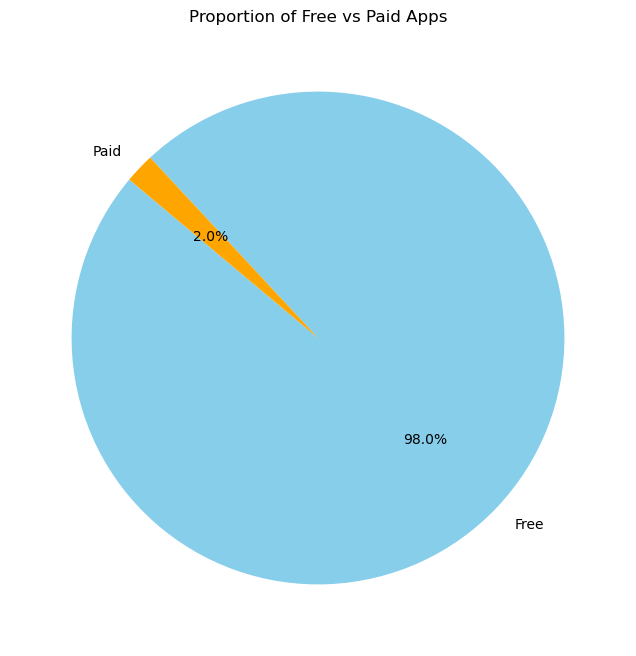

In [11]:
#Free vs Paid Apps
free_vs_paid = playstore['Free'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
free_vs_paid.plot.pie(autopct='%1.1f%%', startangle=140, labels=['Free', 'Paid'], colors=['skyblue', 'orange'])
plt.title('Proportion of Free vs Paid Apps')
plt.ylabel('')
plt.show()

###  "Average Rating Over Time". (It shows the trend of average app ratings on the Google Play Store from approximately 2010 to 2021.)

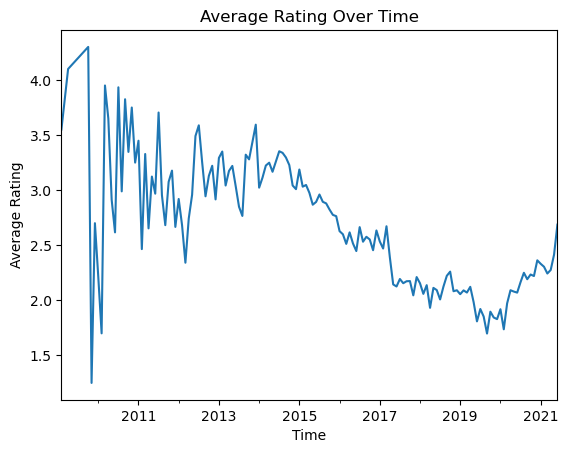

In [12]:
#Average vs Rating Overtime
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])
average_rating_over_time = playstore.groupby(playstore['Last Updated'].dt.to_period('M'))['Rating'].mean()
average_rating_over_time.plot()
plt.title('Average Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()


"Total Installs per Category". (It shows the cumulative installations of apps across different categories on the Google Play Store.)

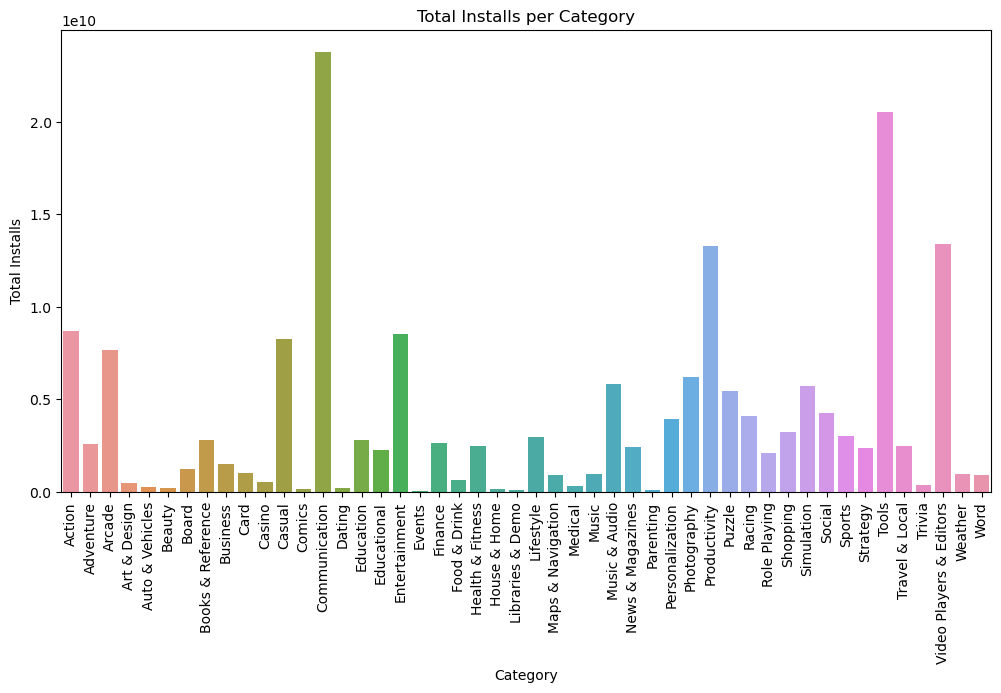

In [13]:
# Grouping by 'Category' and summing 'Installs'
category_installs = playstore.groupby('Category')['Installs'].sum()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=category_installs.index, y=category_installs.values)
plt.xticks(rotation=90)
plt.title('Total Installs per Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.show()

### "Relation Between Ratings and Install Counts". (It shows how the number of installations for apps on the Google Play Store correlates with their ratings.)

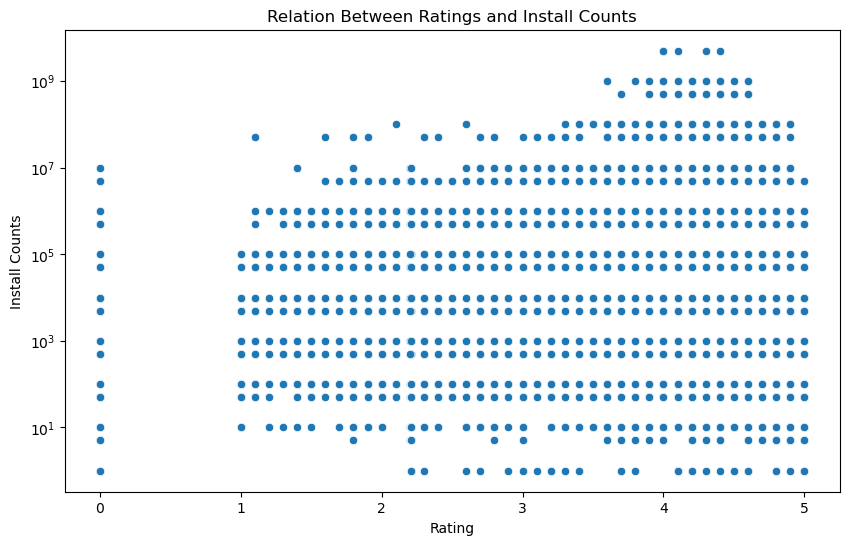

In [14]:
# Rating vs Install Counts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', data=playstore)
plt.title('Relation Between Ratings and Install Counts')
plt.xlabel('Rating')
plt.ylabel('Install Counts')
plt.xscale('linear')
plt.yscale('log')
plt.show()

### Value_Index (For user rating and whether or not it is ad-supported)

In [15]:
playstore['Value_Index'] = playstore['Rating'] * (1 - playstore['Ad Supported'])

### Popularity_Index( Number of installs with its average rating)

In [16]:
playstore['Popularity_Index'] = playstore['Installs'] * playstore['Rating']

### Size_to_Install_Ratio

In [17]:
playstore['Size_to_Install_Ratio'] = playstore['Size_in_MB'] / playstore['Installs']

### Rating_Price_Interaction(App's price and its rating)

In [18]:
playstore['Rating_Price_Interaction'] = playstore['Rating'] * playstore['Price']

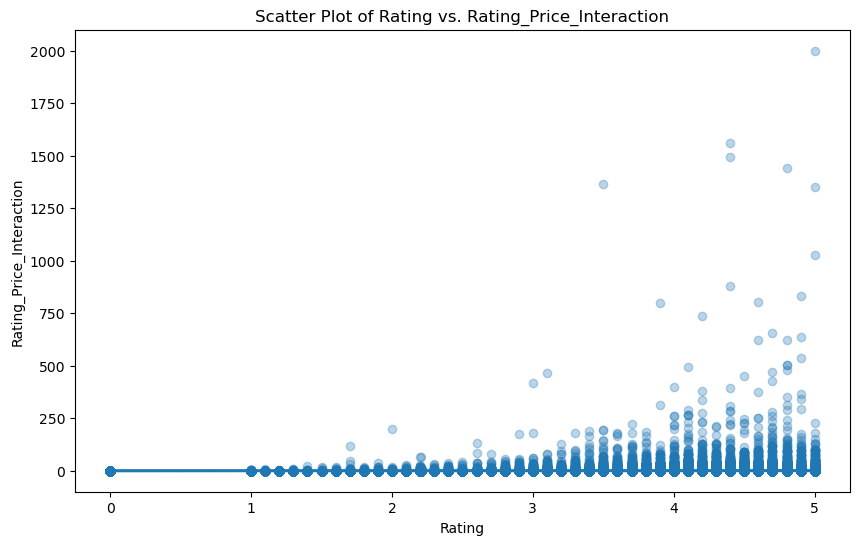

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Rating_Price_Interaction', data=playstore, scatter_kws={'alpha':0.3})
plt.title('Scatter Plot of Rating vs. Rating_Price_Interaction')
plt.xlabel('Rating')
plt.ylabel('Rating_Price_Interaction')
plt.show()

### Free_Ad_Supported(Free to download and ad-supported)

In [20]:
playstore['Free_Ad_Supported'] = np.where((playstore['Price'] == 0) & (playstore['Ad Supported'] == 1), 1, 0)

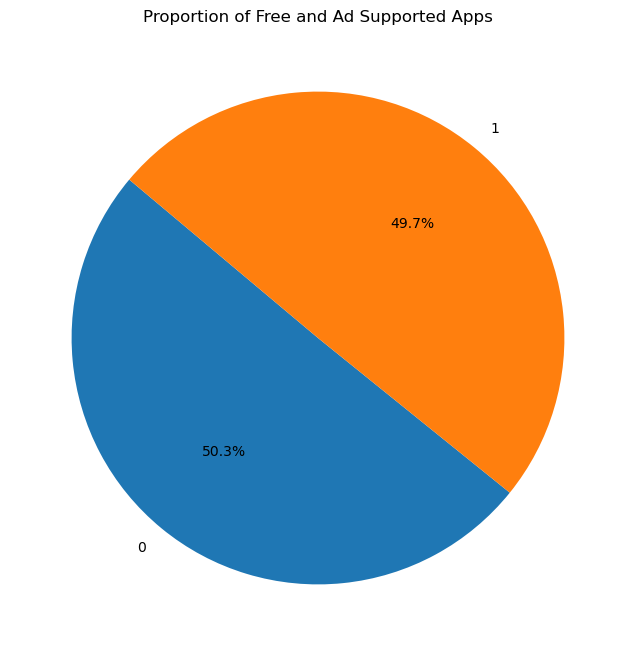

In [21]:
free_ad_supported_counts = playstore['Free_Ad_Supported'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(free_ad_supported_counts, labels=free_ad_supported_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Free and Ad Supported Apps')
plt.show()


### Rating_Bin (Categorizes apps into 'Low', 'Medium', and 'High' rating tiers based on user ratings.)

In [22]:
rating_labels = ['Low', 'Medium', 'High']


min_rating, max_rating = playstore['Rating'].min(), playstore['Rating'].max()
rating_bins = [min_rating - 0.1, 2.5, 4, max_rating + 0.1]  # Ensuring the bins cover the entire range
playstore['Rating_Bin'] = pd.cut(playstore['Rating'], bins=rating_bins, labels=rating_labels)

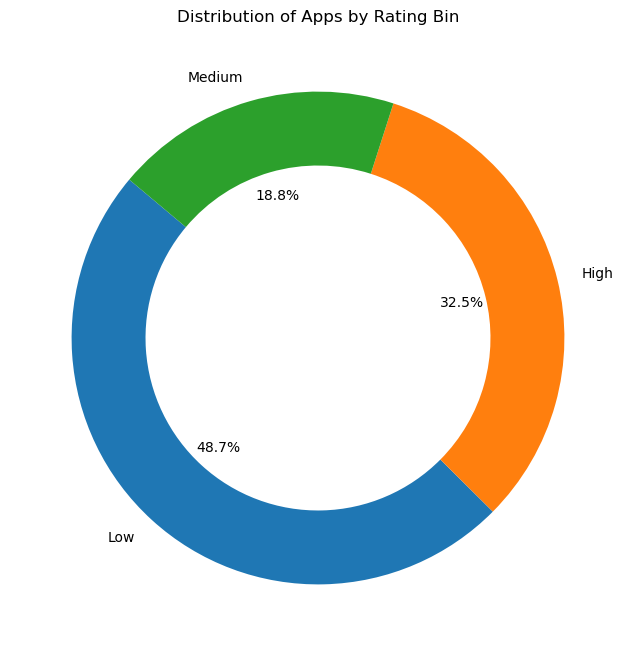

In [23]:
rating_bin_counts = playstore['Rating_Bin'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_bin_counts, labels=rating_bin_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribution of Apps by Rating Bin')
plt.show()

### Distribution of Free vs Paid Apps in each Install_Range

In [24]:
install_bins = [0, 10000, 100000, 1000000, np.inf]  # Adjust these values based on your dataset
install_labels = ['Low', 'Moderate', 'High', 'Very High']
playstore['Install_Range'] = pd.cut(playstore['Installs'], bins=install_bins, labels=install_labels)

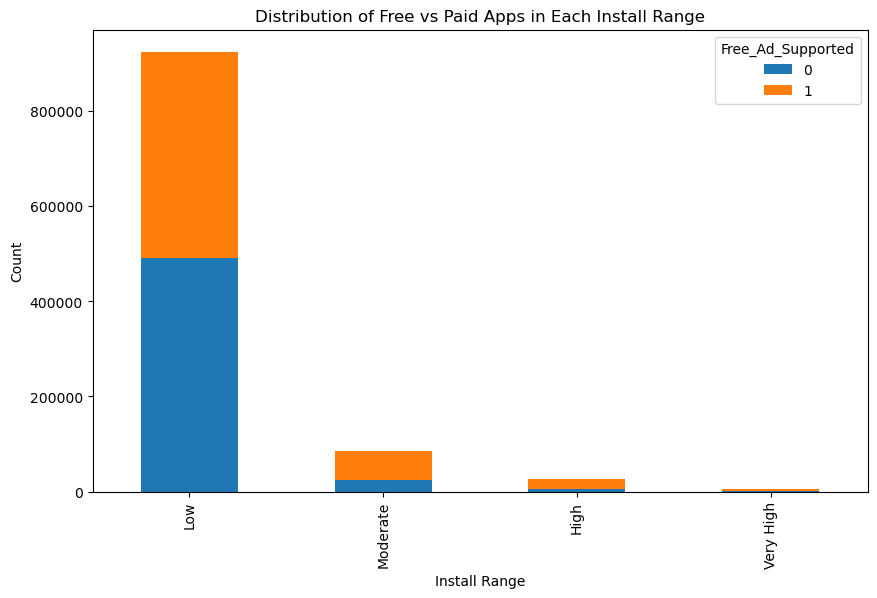

In [25]:
install_range_free_paid = playstore.groupby(['Install_Range', 'Free_Ad_Supported']).size().unstack()
install_range_free_paid.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Free vs Paid Apps in Each Install Range')
plt.xlabel('Install Range')
plt.ylabel('Count')
plt.show()

___